# Exploración de los datos

**Autor:** Isabel Castrillón Acosta

**Fecha:** 25-06-2025

**Descripción del notebook:** Este notebook contiene la exploración de los datos de la prueba técnica 1, incluyendo la carga de datos, la limpieza y el análisis exploratorio. Se utiliza para preparar los datos para el modelado y la visualización.

# 1. Librerías



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carga de datos


In [2]:
x = pd.read_csv('../Datos/X.csv')
x.head()

,Date,Price
0,2024-04-04,89.18
1,2024-04-03,89.35
2,2024-04-02,88.92
3,2024-04-01,87.42
4,2024-03-28,87.48


In [3]:
y = pd.read_csv('../Datos/Y.csv')
y.head()

,Date,Price
0,12/9/2023,547.33
1,11/9/2023,546.00
2,8/9/2023,545.00
3,7/9/2023,550.00
4,6/9/2023,552.50


Error en el archivo de lectura, voy a tratar de arreglarlo, cambiando los separadores de punto y coma a comas. Y el punto de decimal a coma. 

In [4]:
z = pd.read_csv('../Datos/Z.csv')
z.head()

,Price,Date
0,2225.25,2010-01-01
1,2225.25,2010-01-04
2,2246.50,2010-01-05
3,2302.50,2010-01-06
4,2306.50,2010-01-07


## 2.1 Limpieza 

Arreglar el formato de fecha en el DataFrame y

In [5]:
x['Date'] = pd.to_datetime(x['Date'])
z['Date'] = pd.to_datetime(z['Date'])

In [6]:
z = z[['Date', 'Price']]
z.head()

,Date,Price
0,2010-01-01,2225.25
1,2010-01-04,2225.25
2,2010-01-05,2246.50
3,2010-01-06,2302.50
4,2010-01-07,2306.50


In [7]:
y['Date'] = pd.to_datetime(y['Date'], dayfirst=True, errors='raise')
y

,Date,Price
0,2023-09-12,547.33
1,2023-09-11,546.00
2,2023-09-08,545.00
3,2023-09-07,550.00
4,2023-09-06,552.50
...,...,...
4480,2006-07-17,555.00
4481,2006-07-14,555.00
4482,2006-07-13,555.00
4483,2006-07-12,555.00


# 3. Análisis de Datos

## 3.1 Basic information and check for missing values


In [8]:
x.describe()

,Date,Price
count,9144,9144.000000
mean,2006-06-20 12:57:00.472441088,51.323922
min,1988-06-27 00:00:00,9.640000
25%,1997-07-10 18:00:00,19.687500
50%,2006-07-24 12:00:00,45.940000
75%,2015-06-01 06:00:00,75.207500
max,2024-04-04 00:00:00,146.080000
std,NaN,32.994964


In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9144 entries, 0 to 9143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9144 non-null   datetime64[ns]
 1   Price   9144 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 143.0 KB


In [10]:
y.describe()

,Date,Price
count,4485,4485.000000
mean,2015-02-08 13:59:55.183946496,565.458283
min,2006-07-11 00:00:00,257.500000
25%,2010-10-26 00:00:00,485.000000
50%,2015-02-09 00:00:00,543.670000
75%,2019-05-27 00:00:00,617.670000
max,2023-09-12 00:00:00,1062.370000
std,NaN,145.150530


In [11]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4485 non-null   datetime64[ns]
 1   Price   4485 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 70.2 KB


In [12]:
z.describe()

,Date,Price
count,3565,3565.000000
mean,2016-10-31 14:23:59.999999744,2037.081197
min,2010-01-01 00:00:00,1421.500000
25%,2013-06-03 00:00:00,1767.500000
50%,2016-11-01 00:00:00,1974.750000
75%,2020-04-01 00:00:00,2235.750000
max,2023-08-31 00:00:00,3984.000000
std,NaN,372.976076


In [13]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3565 non-null   datetime64[ns]
 1   Price   3565 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 55.8 KB


### 3.1.1 Hallazgos iniciales

- Todos los dataframes tienen dos columnas: Date y Price. 

- La columna Date está en formato datetime, y la columna Price es de tipo float64.

- No hay valores nulos en ninguna de las columnas de los dataframes.

- El dataframe X tiene 9144 filas, el dataframe Y tiene 4485 filas y el dataframe Z tiene 3565 filas.

- Las fechas en los dataframes X, Y y Z son diferentes, lo que indica que los datos provienen de diferentes fuentes o períodos de tiempo.

  - En el X dataframe, las fechas van desde el 1988-06-27 al 2024-04-04.

  - En el Y dataframe, las fechas van desde el 2006-07-11 al 2023-09-12.

  - En el Z dataframe, las fechas van desde el 2010-01-01 al 2023-08-31.

## 3.2 Visualización de los datos

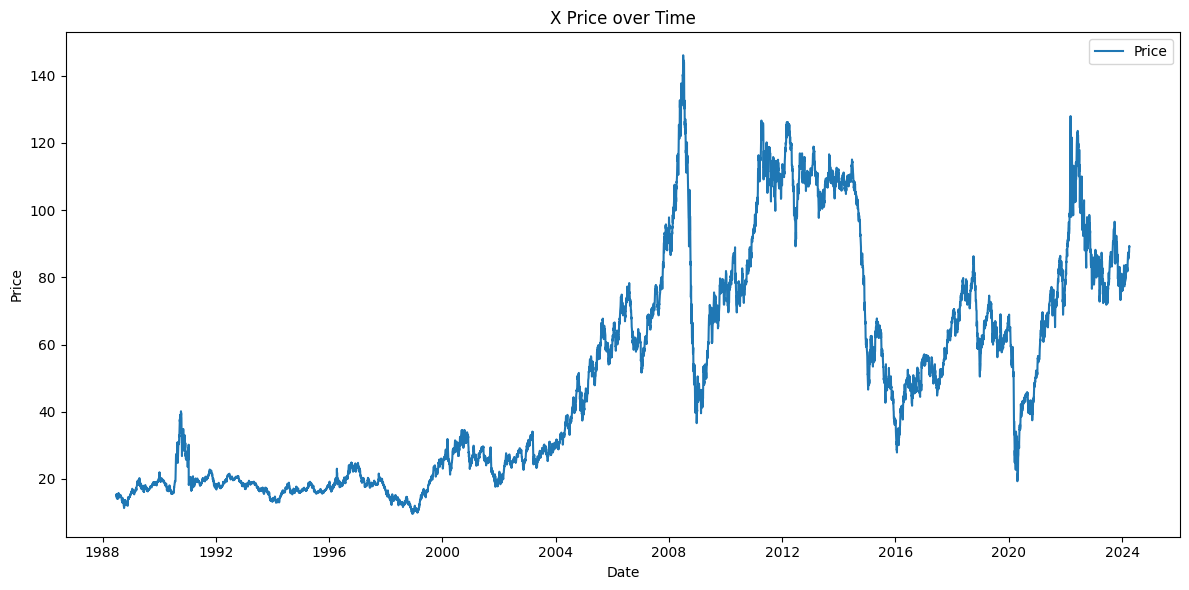

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(x['Date']), x['Price'], label='Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('X Price over Time')
plt.legend()
plt.tight_layout()
plt.show()

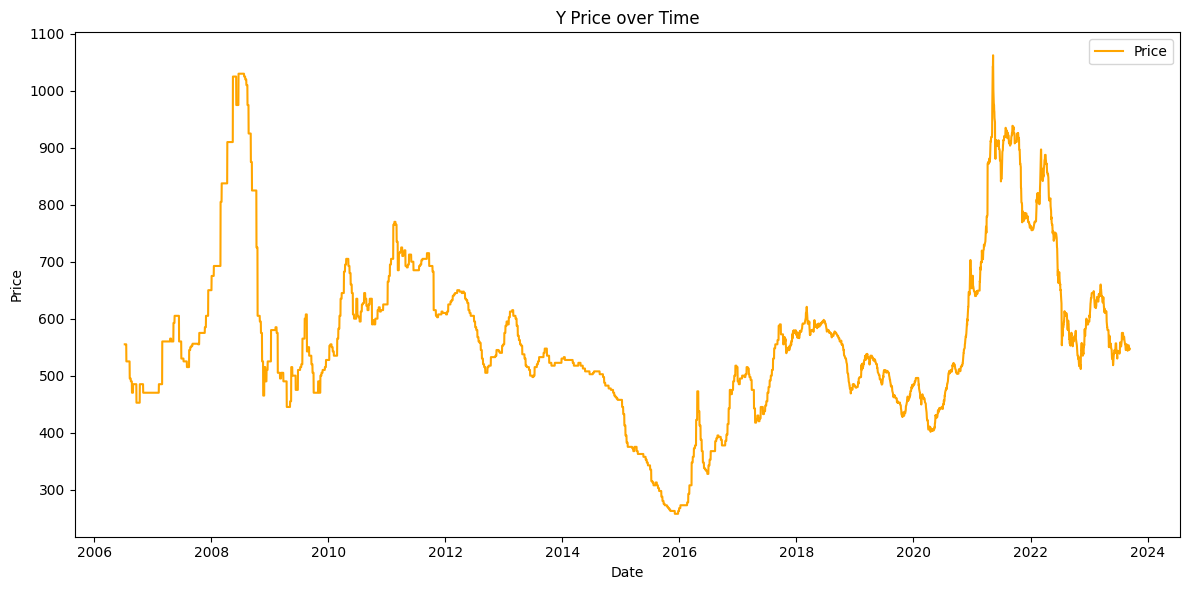

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(y['Date']), y['Price'], label='Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Y Price over Time')
plt.legend()
plt.tight_layout()
plt.show()

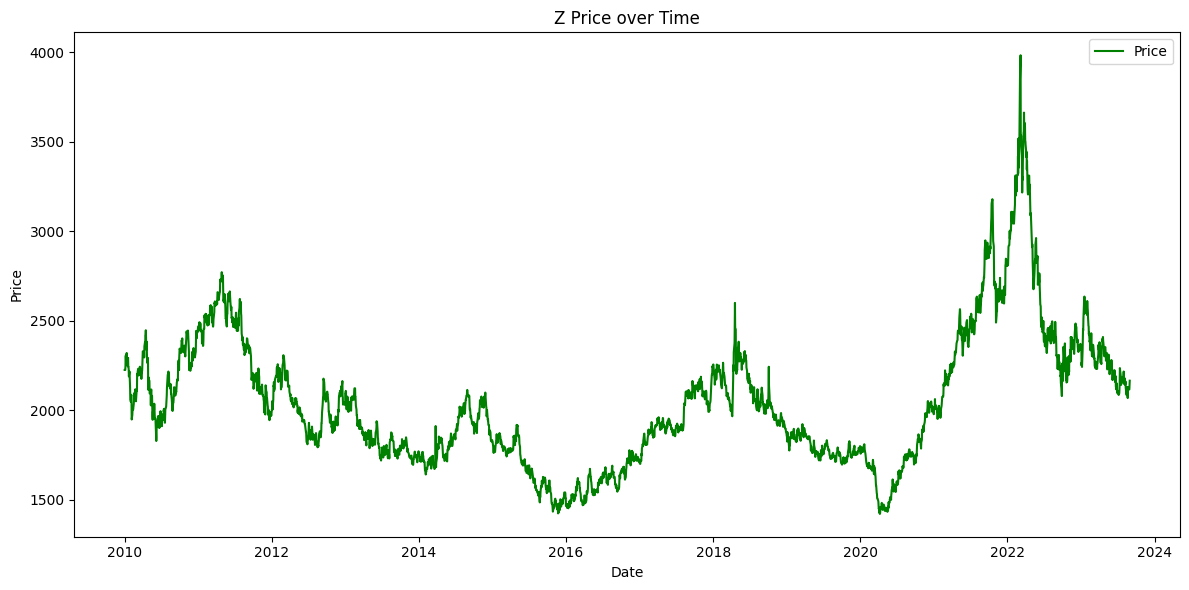

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(z['Date']), z['Price'], label='Price', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Z Price over Time')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Guardar los dataframes

In [18]:
x.to_csv('../Datos/X_cleaned.csv', index=False)
y.to_csv('../Datos/Y_cleaned.csv', index=False)
z.to_csv('../Datos/Z_cleaned.csv', index=False)